<a href="https://colab.research.google.com/github/Avinandan22/ProbabilisticMachineLearning-PClub/blob/master/GMM_EM_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

Saving mnist_test.csv to mnist_test.csv


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
data = pd.read_csv("mnist_test.csv")
X = np.array(data.iloc[ : , 1 : 785])
F = X.shape[1]
N = X.shape[0]

In [0]:
#generating pi - a multinoulli distribution for the various clusters
k = 10
pi = np.random.randint(1,2,size = k)
pi = pi / sum(pi)
pi

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [0]:
#generating mu
mu = np.random.randint(0,256,size = (k, F))

In [0]:
#generating isotropic sigma
sigma = np.random.randint(1,5,size = (k, F)) 

In [0]:
#creating gamma
gamma = np.zeros((N, k))
Nk = np.zeros(k)
np.sum(gamma,axis = 0)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [0]:
def exp_Gaussian(X, mu, sigma):
  return -0.5 * ((X - mu) ** 2) @ (1 / sigma) 
pi[0] * exp_Gaussian(X[0], mu[0], sigma[0])

-376220.2375

In [0]:
NK = np.zeros(k)

In [0]:
epoch = 1
for i in range (epoch):
  #E step
  for j in range (N):
    temp = np.zeros(k)
    for z in range(k):
      temp[z] = exp_Gaussian(X[j], mu[z], sigma[z]) + np.log(pi[z]) - np.sum(np.log(sigma[z]))
    c = np.amax(temp)
    temp2 = np.exp(temp - c)
    b = np.log(np.sum(temp2))
    for z in range(k):
      gamma[j][z] = np.exp(temp[z] - b - c)
      #print (gamma[j][z]) 
  NK = np.sum(gamma,axis = 0)
  pi = NK / N
  for z in range(k):
    print (NK[z])
  #M step
  for z in range (k):
    if(NK[z] != 0):
      mu[z] = np.sum((X.T * gamma[:, z]).T, axis = 0) / NK[z]
      sigma[z] = np.sum(((((X - mu[z]) ** 2).T * gamma[:, z]).T) , axis = 0) / NK[z]
  

7746.968102989458
557.0000000210335
0.0
8.0
93.0
162.0
14.0
0.0
884.0318970109471
534.9999999790452


In [0]:
sigma[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     7,     3,
           7,     4,    20,    50,    79,    62,    69,    48,     8,
          22,    18,    15,     3,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     7,    29,
          29,    36,    71,   182,   397,   539,   602,   794,   779,
         564,   372,   341,   312,   208,   106,    63,    17,     0,
           0,     0,     0,     0,     0,     0,     0,     2,    13,
          41,    67,   176,   375,   759,  1149,  1485,  1908,  2117,
        2020,  1623,  1285,  1200,  1023,   671,   376,   209,    67,
          29,     9,     3,     0,     0,     0,     0,     0,    10,
          25,   118,   328,   705,  1313,  2290,  3362,  4333,  5271,
        5940,  5946,

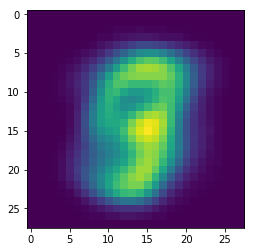

In [0]:
plt.imshow(mu[0].reshape(28, 28))